In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire

#### 1. Convert date column to datetime format.

In [19]:
df = acquire.get_combined_csv()

In [20]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [21]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [22]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

#### 2. Plot the distribution of sale_amount and item_price.

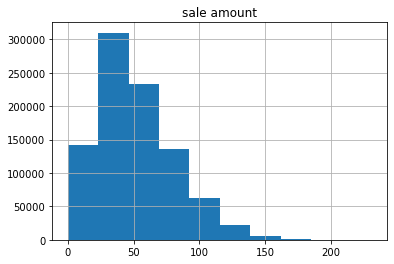

In [6]:
df.sale_amount.hist()
plt.title('sale amount')
plt.show()

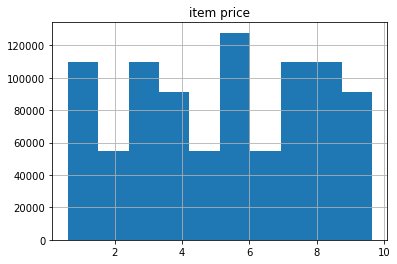

In [7]:
df.item_price.hist()
plt.title('item price')
plt.show()

#### 3. Set the index to be the datetime variable.

In [8]:
df = df.set_index('sale_date').sort_index()

#### 4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.month_name()

In [10]:
df['dayofweek'] = df.index.day_name()

In [11]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dayofweek
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday


#### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [12]:
df['sales_total'] = df.sale_amount*df.item_price

In [13]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [14]:
def prepare_sales(df):
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.month_name()
    df['dayofweek'] = df.index.day_name()
    df['sales_total'] = df.sale_amount*df.item_price
    
    return df

In [23]:
test = acquire.get_combined_csv()

In [24]:
import prepare

In [25]:
test = prepare.prepare_sales(test)

In [26]:
test.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


#### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [27]:
df = acquire.get_power_data()

#### 1. Convert date column to datetime format.

In [28]:
df.columns = df.columns.str.lower()

In [29]:
df.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [30]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

#### 2. Plot the distribution of each of your variables.

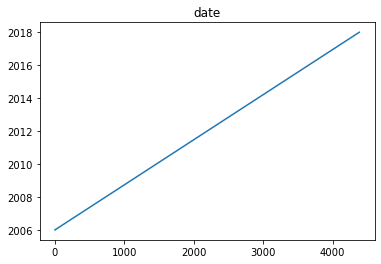

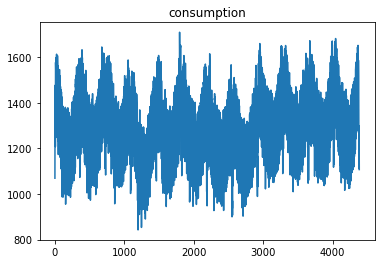

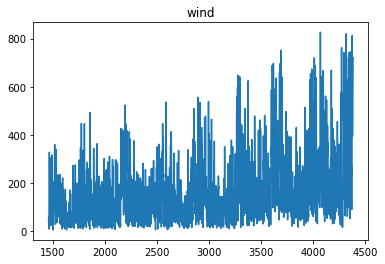

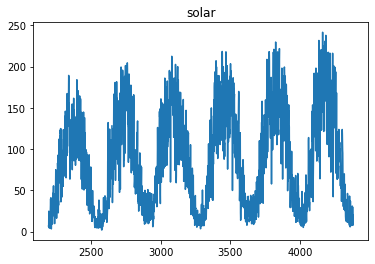

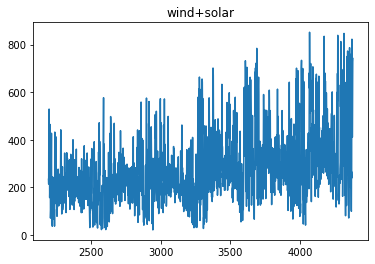

In [31]:
for col in df:
    df[col].plot()
    plt.title(col)
    plt.show()

#### 3. Set the index to be the datetime variable.

In [32]:
df = df.set_index('date').sort_index()

#### 4. Add a month and a year column to your dataframe.

In [33]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

In [34]:
df.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


#### 5. Fill any missing values.

In [35]:
df.isnull().sum()

consumption       0
wind           1463
solar          2195
wind+solar     2196
month             0
year              0
dtype: int64

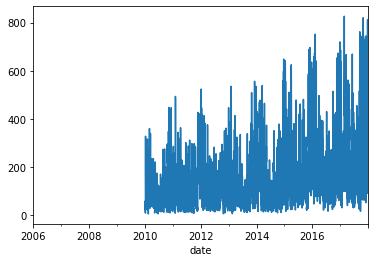

In [36]:
df.wind.plot()
plt.show()

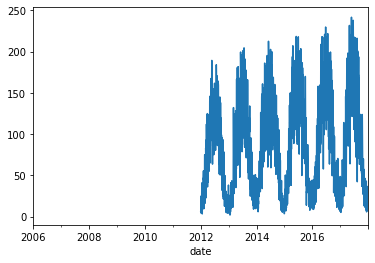

In [37]:
df.solar.plot()
plt.show()

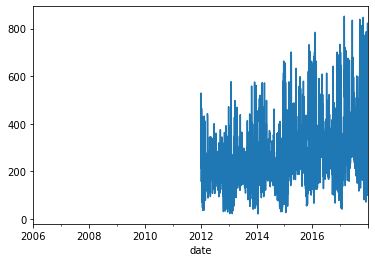

In [39]:
df['wind+solar'].plot()
plt.show()

In [40]:
df = df.fillna(0)

#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [41]:
def prepare_power_data(df):
    df.columns = df.columns.str.lower()
    df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
    df = df.set_index('date').sort_index()
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    df = df.fillna(0)
    
    return df

In [4]:
import prepare

In [7]:
test = acquire.get_power_data()

In [8]:
test = prepare.prepare_power_data(test)

In [9]:
test.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
